# PROJECT BY: SYEDA UMAIMA TAMKEEN
__________________________________________________________________________________________________________________________________________________________________________________

# Project Title: Predicting Customer Churn Using Machine Learning

**Summary:**  
In this project, I developed a classification model to predict customer churn based on customer usage patterns and demographics. The objective was to determine whether a customer will leave the service, helping businesses retain valuable customers. I implemented Logistic Regression, Random Forest, and Gradient Boosting models. After hyperparameter tuning, the Random Forest model achieved a balanced accuracy and high performance, providing valuable insights for churn prediction.

> **Key Steps:**

1. **Data Exploration:**

- Loaded and analyzed a dataset consisting of customer demographic and usage features.
- Visualized the distribution of churners and non-churners and inspected the correlation between key features.
- Investigated patterns of continuous features like **MonthlyCharge** and **DayMins** to understand their relationship with customer churn.

2. **Data Preprocessing:**

- Cleaned the dataset by handling any missing values.
- Converted categorical variables such as `ContractRenewal` and `DataPlan` into appropriate formats using one-hot encoding.
- Standardized continuous features like **DataUsage** and **OverageFee** to prepare them for model training.

3. **Feature Engineering:**

- Applied feature scaling to continuous variables using **StandardScaler** for better performance with machine learning models.
- Generated new insights from customer service call data and other features by exploring their impact on churn.
  
4. **Model Training:**

- Trained three models for comparison: **Logistic Regression**, **Random Forest**, and **Gradient Boosting**.
- Split the dataset into training and test sets, maintaining an 80/20 split to ensure a robust evaluation on unseen data.
  
5. **Model Evaluation:**

- Evaluated all three models using accuracy, precision, recall, and F1-score.
- Random Forest was found to be the best-performing model, achieving:
  - **Accuracy: 93.1%**
  - **Precision (Churn = 1): 88%**
  - **Recall (Churn = 1): 63%**
  - **F1-Score (Churn = 1): 0.74**
- The **AUC-ROC** score was also used to compare model performance.

6. **Model Fine-Tuning:**

- Fine-tuned the Random Forest model using **GridSearchCV** to optimize hyperparameters such as `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf`.
- After hyperparameter optimization, the model achieved the best parameters:
  - `n_estimators`: 200
  - `max_depth`: 30
  - `min_samples_split`: 5
  - `min_samples_leaf`: 2
- These adjustments improved the model's balance between precision and recall without sacrificing performance.

> # Results:

**Model Evaluation Metrics (Random Forest):**

- **Accuracy:** 93.1%
- **Precision (Churn = 1):** 88%
- **Recall (Churn = 1):** 63%
- **F1-Score (Churn = 1):** 0.74
- **AUC-ROC Score:** 0.93

**Best Parameters (after tuning):**

- `n_estimators`: 200
- `max_depth`: 30
- `min_samples_split`: 5
- `min_samples_leaf`: 2

> # Conclusion:

The Random Forest model performed exceptionally well in predicting customer churn, achieving a high level of accuracy. Despite a slight trade-off in recall for predicting churners, the model's overall performance suggests it can be a valuable tool for businesses aiming to retain customers. Future work could involve addressing class imbalance through techniques like **SMOTE** or applying ensemble models for further improvements. This project demonstrates the effectiveness of machine learning in predicting customer churn and can be deployed in real-world scenarios for retention strategy optimization.


# Import libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



# Load the dataset

In [29]:
df = pd.read_csv("Customer_Churn.csv")


In [30]:
df.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [31]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB
None


In [32]:
print("Missing values per column:\n", df.isnull().sum())
df.dropna(inplace=True)

Missing values per column:
 Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64


# Converting categorical variables

In [33]:
df['ContractRenewal'] = df['ContractRenewal'].astype('category')
df['DataPlan'] = df['DataPlan'].astype('category')

# Exploratory Data Analysis (EDA)

In [34]:
print(df.describe())


             Churn  AccountWeeks    DataUsage  CustServCalls      DayMins  \
count  3333.000000   3333.000000  3333.000000    3333.000000  3333.000000   
mean      0.144914    101.064806     0.816475       1.562856   179.775098   
std       0.352067     39.822106     1.272668       1.315491    54.467389   
min       0.000000      1.000000     0.000000       0.000000     0.000000   
25%       0.000000     74.000000     0.000000       1.000000   143.700000   
50%       0.000000    101.000000     0.000000       1.000000   179.400000   
75%       0.000000    127.000000     1.780000       2.000000   216.400000   
max       1.000000    243.000000     5.400000       9.000000   350.800000   

          DayCalls  MonthlyCharge   OverageFee     RoamMins  
count  3333.000000    3333.000000  3333.000000  3333.000000  
mean    100.435644      56.305161    10.051488    10.237294  
std      20.069084      16.426032     2.535712     2.791840  
min       0.000000      14.000000     0.000000     0.00000

# Data Visualization 

C:\Users\SYED HASEEB ALI\AppData\Local\Temp\ipykernel_16704\1570023448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


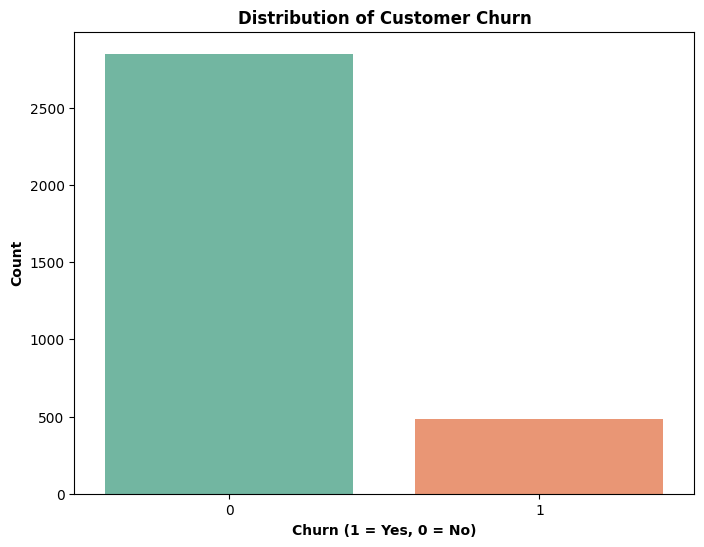

In [36]:
# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Distribution of Customer Churn',  fontweight = 'bold')
plt.xlabel('Churn (1 = Yes, 0 = No)',  fontweight = 'bold')
plt.ylabel('Count',  fontweight = 'bold')
plt.show()

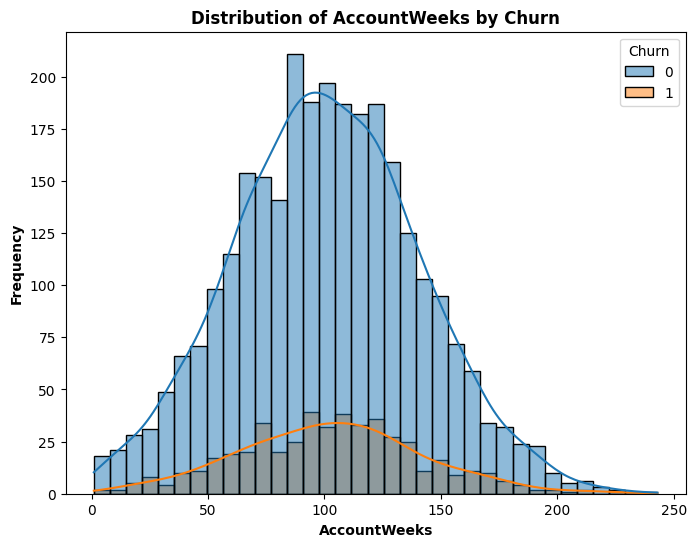

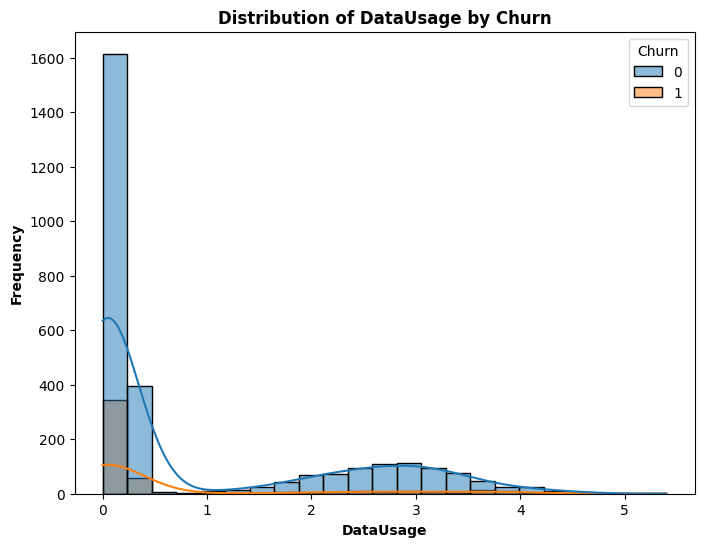

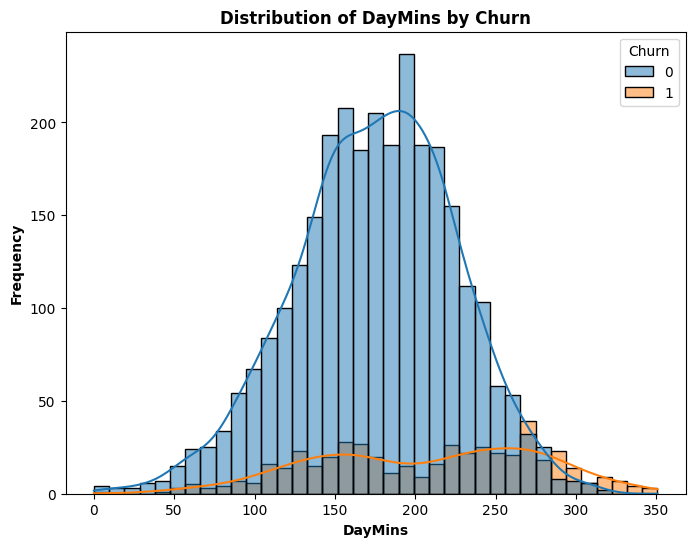

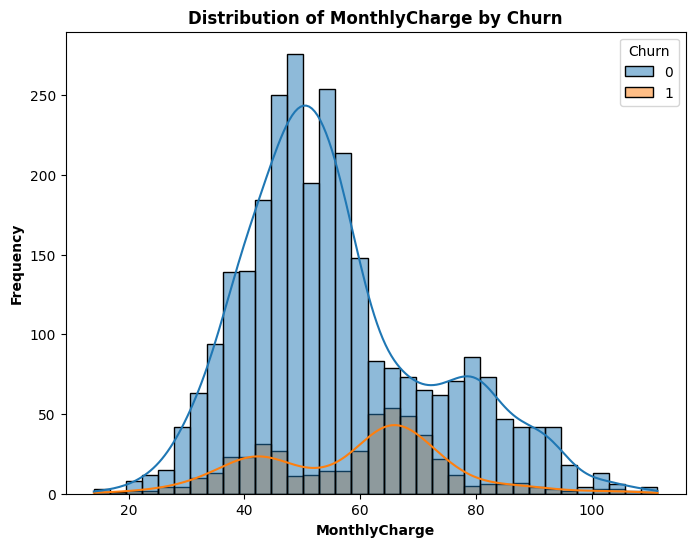

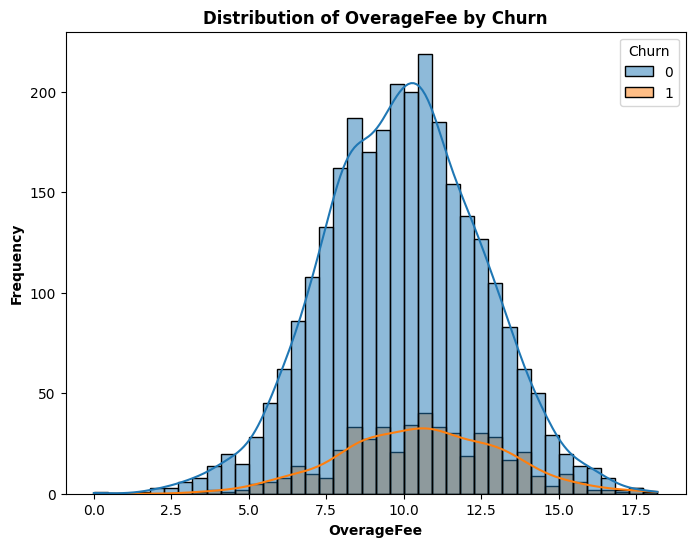

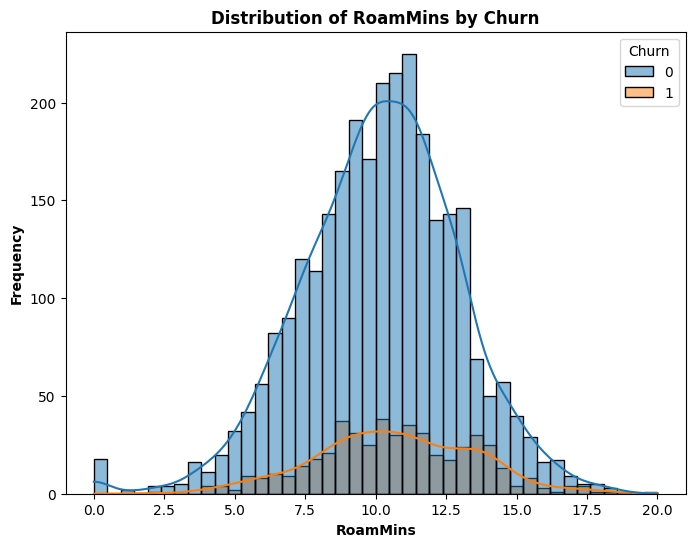

In [37]:
# Visualize distributions of continuous features
continuous_features = ['AccountWeeks', 'DataUsage', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins']
for feature in continuous_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True)
    plt.title(f'Distribution of {feature} by Churn',  fontweight = 'bold')
    plt.xlabel(feature,  fontweight = 'bold')
    plt.ylabel('Frequency',  fontweight = 'bold')
    plt.show()

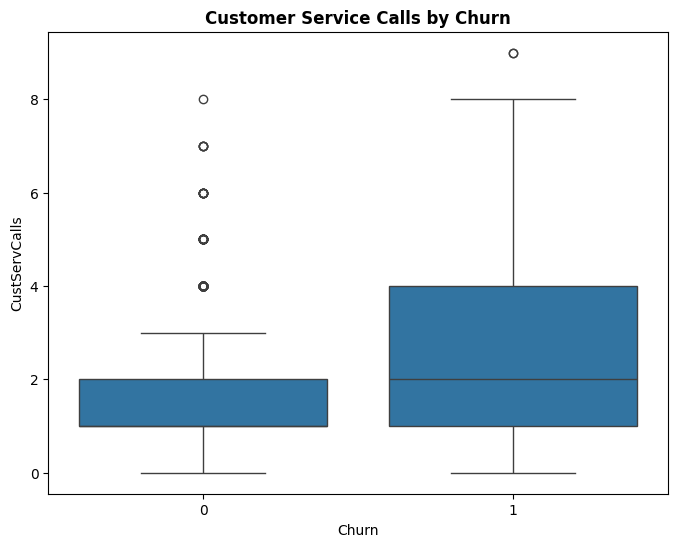

In [38]:
# Visualize CustServCalls feature by Churn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Churn', y='CustServCalls')
plt.title('Customer Service Calls by Churn',  fontweight = 'bold')
plt.show()

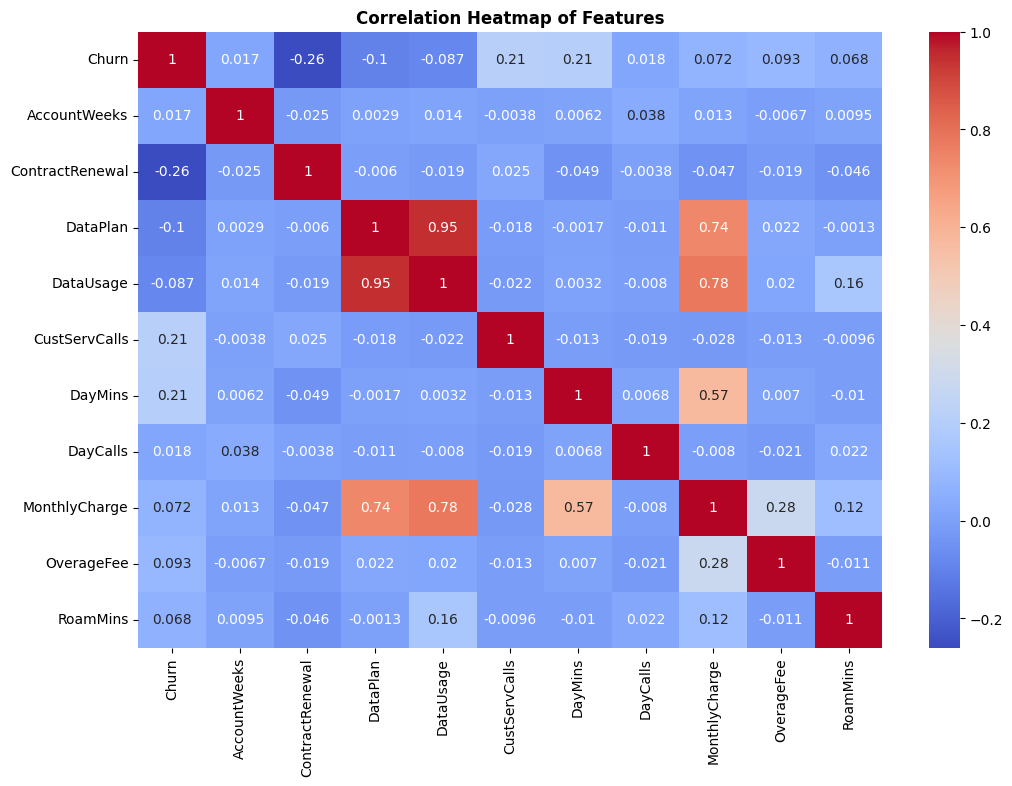

In [39]:
# Check for correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features',  fontweight = 'bold')
plt.show()

# Feature Engineering

In [40]:
scaler = StandardScaler()
df[continuous_features] = scaler.fit_transform(df[continuous_features])

# Model Selection and Training

In [41]:
X = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)  # Get dummy variables for categorical features
y = df['Churn']


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [43]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8605697151424287
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.64      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.76      0.58      0.60       667
weighted avg       0.84      0.86      0.83       667



c:\Users\SYED HASEEB ALI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forest Model

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9325337331334332
Random Forest Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.64      0.74       101

    accuracy                           0.93       667
   macro avg       0.91      0.81      0.85       667
weighted avg       0.93      0.93      0.93       667



# Gradient Boosting Model

In [45]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9370314842578711
Gradient Boosting Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       566
           1       0.88      0.67      0.76       101

    accuracy                           0.94       667
   macro avg       0.91      0.83      0.86       667
weighted avg       0.93      0.94      0.93       667



# Model Evaluation and Fine-Tuning

In [46]:
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
gb_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

In [47]:
print("Logistic Regression AUC-ROC:", log_reg_auc)
print("Random Forest AUC-ROC:", rf_auc)
print("Gradient Boosting AUC-ROC:", gb_auc)

Logistic Regression AUC-ROC: 0.8303537067487667
Random Forest AUC-ROC: 0.9200048980163034
Gradient Boosting AUC-ROC: 0.9084158415841583


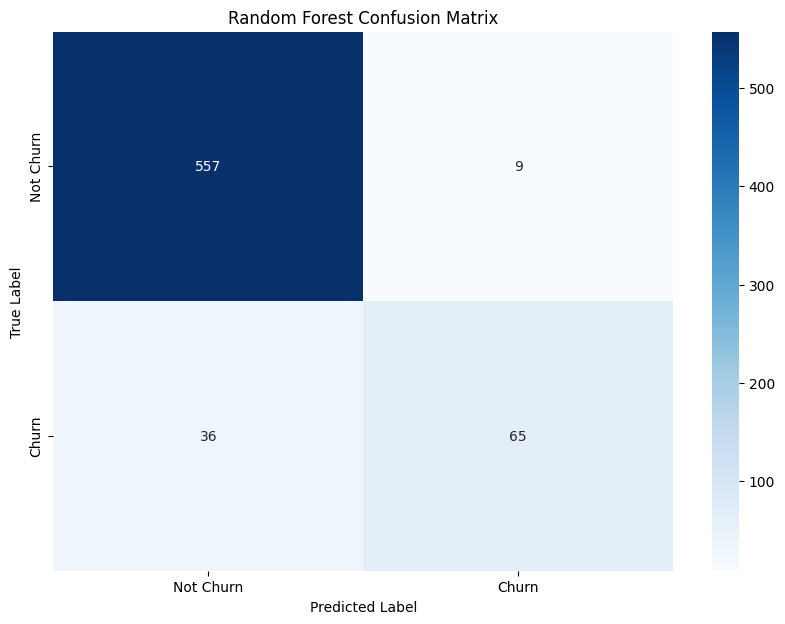

In [50]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [49]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]})

In [51]:
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest Accuracy:", grid_rf.best_score_)


Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Accuracy: 0.940360197033258


In [52]:
rf_model_tuned = RandomForestClassifier(**grid_rf.best_params_)
rf_model_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5)

In [53]:
y_pred_rf_tuned = rf_model_tuned.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Tuned Random Forest Report:\n", classification_report(y_test, y_pred_rf_tuned))

Tuned Random Forest Accuracy: 0.9280359820089955
Tuned Random Forest Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.87      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.93      0.93      0.92       667



In [55]:
import joblib
joblib.dump(rf_model_tuned, 'churn_prediction_model.pkl')

['churn_prediction_model.pkl']

In [56]:
loaded_model = joblib.load('churn_prediction_model.pkl')
